In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt


from report import Report, open_single_report_file, open_5fcv_report

# Single report resuls

In [4]:
# Reports location and information
# report_content = open_single_report_file("../results/report_0.json")
# if report_content is None:
#     print("No report found")
# #     exit(1)

# report = Report(report_content)
# report.clean()

NameError: name 'report' is not defined

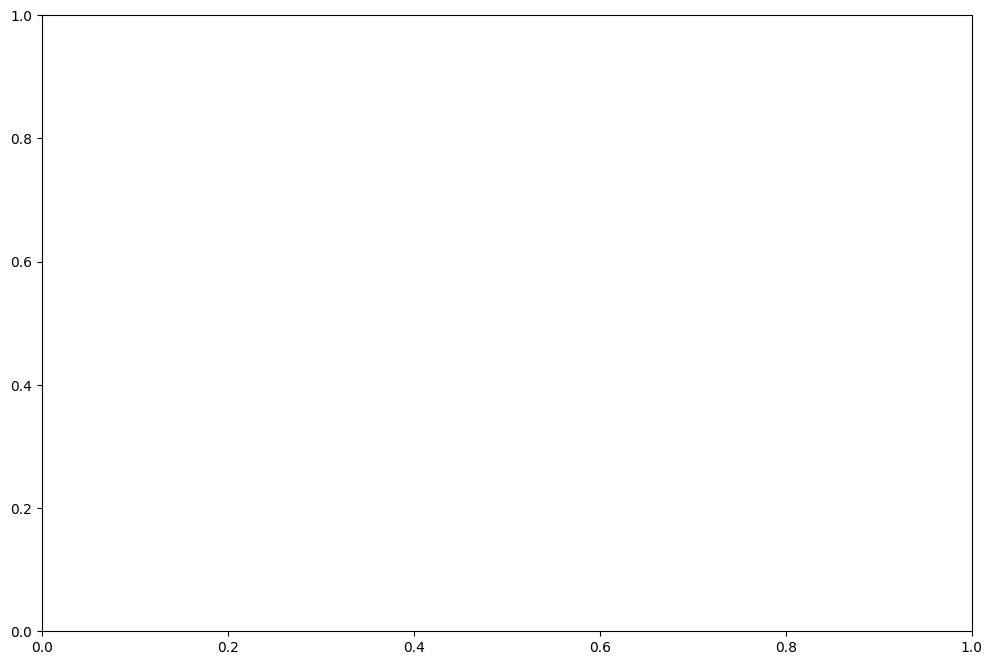

: 

In [ ]:
# Correct visualization for single report
fig, ax = plt.subplots(figsize=(12, 8))

# Extract metric data
plot_metric = "accuracy"  # Define the metric to plot
rounds, metric_values = report.extract_central_eval_metric(plot_metric)

# Plot data
ax.plot(rounds, metric_values, '-o', linewidth=2, markersize=6)
ax.set_title(f"Performance Metrics - {plot_metric.capitalize()}", fontsize=16)
ax.set_xlabel("Rounds", fontsize=14)
ax.set_ylabel(plot_metric.capitalize(), fontsize=14)
ax.grid(True, linestyle='--', alpha=0.7)

# Print summary
print(f"======= Results Summary =======")
if "hyperparams" in report.report:
    print(f"Hyperparameters: {report.report['hyperparams']}")
print(f"Final {plot_metric}: {metric_values[-1]:.4f}")
print(f"Maximum {plot_metric}: {np.max(metric_values):.4f}")

plt.tight_layout()

# Multipe report results

In [ ]:

# Reports location and information
results_dir = "../results/"
runs = 3
all_reports: list[Report] = []

for run in range(runs):
    path = os.path.join(results_dir, f"report_{run}.json")
    report = open_single_report_file(path)
    
    if report is None:
        continue
    
        
    all_reports.append(Report(report))
all_reports

======= Results Summary for Run 0 =======
Hyperparameters: {'model': 'mlp', 'lr': 0.003, 'mlp-name': 'Net1layer'}
IL Config: {'initial-round-percentage': 0.1, 'num-initial-server-rounds': 20, 'num-rounds-per-increment': 10, 'num-increments': 4, 'data-strategy': 'replay', 'replay-percentage': 0.0, 'ewc-lambda': 1.0}
Final loss: 0.7930
Maximum loss: 0.8667
======= Results Summary for Run 0 =======
Hyperparameters: {'model': 'mlp', 'lr': 0.003, 'mlp-name': 'Net1layer'}
IL Config: {'initial-round-percentage': 0.2, 'num-initial-server-rounds': 20, 'num-rounds-per-increment': 10, 'num-increments': 10, 'data-strategy': 'replay', 'replay-percentage': 0.0, 'ewc-lambda': 1.0}
Final loss: 0.6672
Maximum loss: 1.1210
======= Results Summary for Run 0 =======
Hyperparameters: {'model': 'mlp', 'lr': 0.003, 'mlp-name': 'Net1layer'}
IL Config: {'initial-round-percentage': 0.1, 'num-initial-server-rounds': 20, 'num-rounds-per-increment': 10, 'num-increments': 10, 'data-strategy': 'replay', 'replay-perc

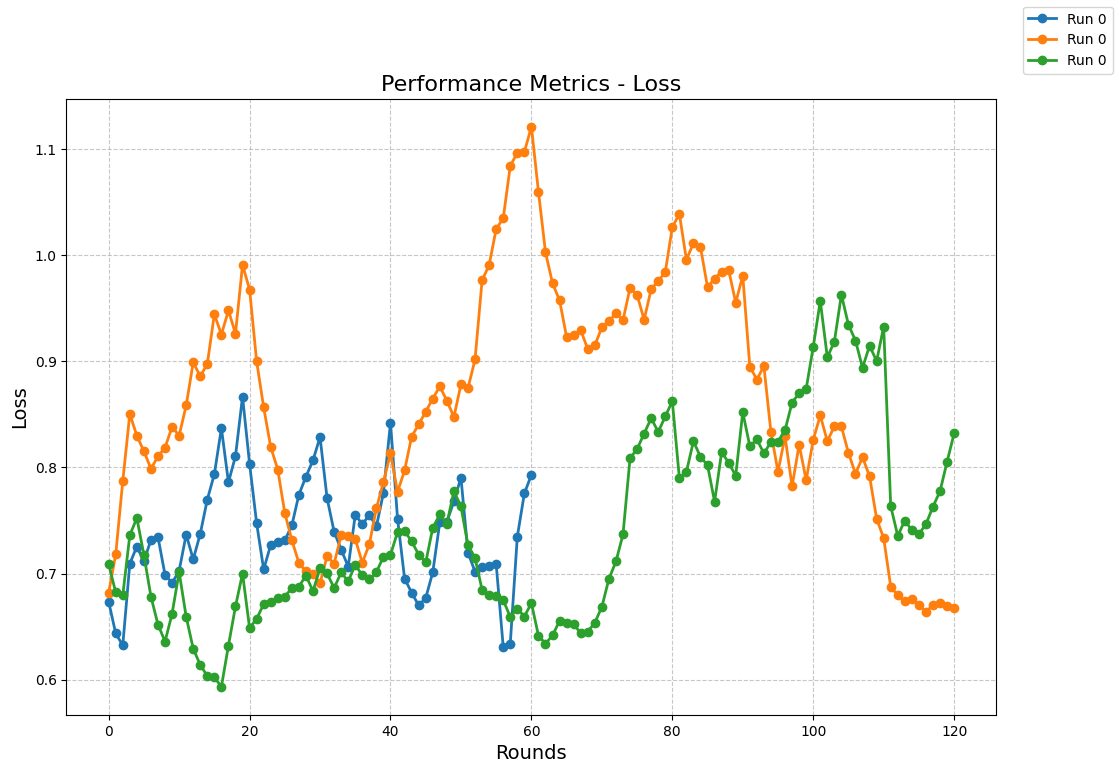

In [ ]:

plot_metric = "loss"  # Define the metric to plot

fig, ax = plt.subplots(figsize=(12, 8))
# Extract metric data
ax.set_title(f"Performance Metrics - {plot_metric.capitalize()}", fontsize=16)
ax.set_xlabel("Rounds", fontsize=14)
ax.set_ylabel(plot_metric.capitalize(), fontsize=14)
ax.grid(True, linestyle='--', alpha=0.7)

for run_report in all_reports:
    rounds, metric_values = run_report.extract_central_eval_metric(plot_metric)

    # Plot data
    ax.plot(rounds, metric_values, '-o', linewidth=2, markersize=6, label=f"Run {run_report.report['run_id']}")

    print(f"======= Results Summary for Run {run_report.report['run_id']} =======")
    if "hyperparams" in run_report.report:
        print(f"Hyperparameters: {run_report.report['hyperparams']}")
    if "il_config" in run_report.report:
        print(f"IL Config: {run_report.report['il_config']}")
    print(f"Final {plot_metric}: {metric_values[-1]:.4f}")
    print(f"Maximum {plot_metric}: {np.max(metric_values):.4f}")


fig.legend()

# Hyper parameter tuning results

In [ ]:
from report import open_experiment_report

all_reports = open_experiment_report("../results/exp1_2c_mlp")
all_reports

In [ ]:
# Ranking the runs
metric = "accuracy"

run_ranks = []
for run, report in enumerate(all_reports):
    final_metric = report.get_final(metric)
    max_metric = report.get_max(metric)
    run_ranks.append((run, final_metric, max_metric))

run_ranks.sort(key=lambda x: x[1], reverse=True) 
print(f"Ranks: {metric} ")
for rank, (run, metric_value, max_value) in enumerate(run_ranks, start=1):
    print(f"{rank}: Run {run} with metric value {metric_value:.4f},  {max_value:.4f}  max")


Ranks: accuracy 
1: Run 11 with metric value 0.8380,  0.8380  max
2: Run 8 with metric value 0.8370,  0.8370  max
3: Run 10 with metric value 0.8360,  0.8370  max
4: Run 9 with metric value 0.8350,  0.8350  max
5: Run 0 with metric value 0.8210,  0.8400  max
6: Run 1 with metric value 0.8190,  0.8410  max
7: Run 7 with metric value 0.8190,  0.8430  max
8: Run 2 with metric value 0.8100,  0.8390  max
9: Run 6 with metric value 0.8100,  0.8340  max
10: Run 5 with metric value 0.8090,  0.8360  max
11: Run 4 with metric value 0.8030,  0.8360  max
12: Run 3 with metric value 0.7090,  0.7390  max


In [ ]:
fig, ax = plt.subplots()

ax.set_title(all_reports[0].get_experiment_name())

plot_metric = "accuracy"  # Define the metric to plot

for run, FFoldResults in enumerate(all_reports):
    print(f"======= Results for Run {run}: ======")
    hyperparams = FFoldResults.hyperparameters()
    print(f"Hyperparameters: {hyperparams}")
    # il_config = FFoldResults.il_config()
    # print(f"IL Config: {il_config}")
    print(f"{plot_metric}: {FFoldResults.get_max_final(plot_metric)}")
    
    rounds, accuracy_mean, accuracy_std = FFoldResults.get_mean_std(plot_metric)
    
    ax.plot(rounds, accuracy_mean, '-o', label=f"Run {run}")
    ax.fill_between(rounds, accuracy_mean - accuracy_std, accuracy_mean + accuracy_std, alpha=0.1)
    
    
    rounds, loss_mean, loss_std = FFoldResults.get_mean_std("loss")
    ax.plot(rounds, loss_mean, '--', label=f"Loss Run {run}")

fig.legend()

ax.set_ylim(0.3,0.85)
fig.set_size_inches(12, 8)


NameError: name 'plt' is not defined

# Overfit graphs